# UCB yani ilk REİNFORCED ALGORİTMASINA BAKACAĞIZ 

--üst güven sınıfırı olarak bilinir

--aralarında problem çıakrtmayacak aralık bölüt olarak adlandırılır bu güven 

--bildiğimiz ya da bilmediğimiz bir dağılım vardır algoritmanın arkasında 

--mantığı nedir buna bakalım şimdi de 

:kullanıcı her seferinde bir eylem yapar (event-e)

:bu eylem karşılığında bir skor döner (örneğin web tıklaması 1 ; tıklanmaması 0)

:amaç tıklamaları maksimuma çıkartmaktır!!!



# elimizde reklam verileri var 

--kullanıcı bunloarın bazlarına tıklıyor bazılarına tıklamıyor 

--bizim olayımız ise kullanıcının bu tıkladığı ilanlardan en fazla tıklanan ilana yatırım yapmaktır 

--zaman serisi olarak düşün geçmiştekine göre ileri tıklamları tahmin etme işlemi vardır!!!

-- elimizde kullanıcının tıkladığı reklamları gösteren dosya var 

--random selection anlayalım öncelikle : 

: bu herhangi bir zeki seçim yapmıyor ilanları rastgele seçiyor 

: kullanıcının tıklayabilecğei bir seçim yapıyorsak ve kullanıcı bunu seiçyorsa 1 ödül kazanıyoruz fakat tersi olursa ödül kazanmıyoruz !!!

: ucb ile bu ödül miktarını arttırmaya çalışıyoruz !!

: random selection ve ucb ile deneyeceğiz ve max ödül'e ulaşmaya çalışacağız !!!

# random selection'ı kodlayalım 



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
veriler = pd.read_csv("Ads_CTR_Optimisation.csv")

In [3]:
veriler

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [10]:
#import random 

N = 10000 
d = 10
toplam = 0
secilenler = []
for n in range(0,N):
    ad = random.randrange(d)
    secilenler.append(ad)
    odul = veriler.values[n,ad] #veirlerde n. satır = 1 ise ödül = 1
    toplam = toplam+odul 

In [11]:
toplam

1211

In [13]:
secilenler #elimizdeki veirlerle karşılaştırınca odülü alıp almadığımızı görürüz !!!

[3,
 7,
 6,
 7,
 9,
 2,
 7,
 4,
 0,
 1,
 7,
 3,
 7,
 4,
 5,
 8,
 8,
 6,
 1,
 9,
 3,
 8,
 4,
 3,
 3,
 7,
 2,
 8,
 6,
 0,
 4,
 7,
 1,
 1,
 3,
 5,
 8,
 5,
 0,
 8,
 2,
 9,
 2,
 0,
 6,
 2,
 6,
 6,
 5,
 3,
 8,
 9,
 5,
 9,
 5,
 2,
 4,
 1,
 7,
 2,
 1,
 2,
 5,
 4,
 3,
 4,
 2,
 5,
 4,
 6,
 1,
 7,
 5,
 2,
 6,
 6,
 5,
 5,
 5,
 7,
 4,
 1,
 7,
 8,
 6,
 4,
 4,
 1,
 3,
 8,
 1,
 4,
 4,
 5,
 0,
 0,
 3,
 8,
 7,
 5,
 6,
 0,
 9,
 0,
 6,
 7,
 7,
 7,
 3,
 8,
 7,
 5,
 5,
 3,
 8,
 3,
 2,
 9,
 8,
 9,
 0,
 4,
 0,
 9,
 9,
 7,
 3,
 9,
 0,
 3,
 4,
 9,
 6,
 7,
 4,
 2,
 2,
 8,
 5,
 0,
 6,
 2,
 6,
 4,
 3,
 6,
 7,
 6,
 7,
 7,
 4,
 1,
 2,
 9,
 6,
 5,
 2,
 4,
 0,
 6,
 6,
 7,
 4,
 8,
 0,
 8,
 1,
 9,
 2,
 4,
 7,
 5,
 4,
 9,
 7,
 7,
 4,
 9,
 3,
 2,
 0,
 0,
 7,
 7,
 5,
 2,
 5,
 1,
 7,
 5,
 8,
 5,
 5,
 6,
 4,
 8,
 8,
 9,
 3,
 2,
 3,
 3,
 9,
 0,
 4,
 3,
 2,
 3,
 0,
 3,
 2,
 8,
 7,
 9,
 6,
 7,
 6,
 2,
 9,
 1,
 9,
 0,
 2,
 0,
 3,
 4,
 1,
 1,
 2,
 8,
 4,
 9,
 9,
 1,
 5,
 6,
 9,
 0,
 0,
 1,
 0,
 3,
 5,
 8,
 1,
 7,
 1,
 4,
 4,
 8,


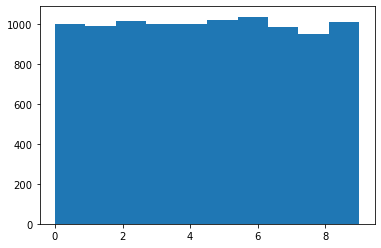

In [14]:
plt.hist(secilenler)
plt.show()